In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
sample  = pd.read_csv('Sample_Submission_ZAuTl8O_FK3zQHh.csv')


In [3]:
train.dropna(inplace = True)


In [4]:

X = train.iloc[:,:-1]
y = train.iloc[:,-1]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_train.select_dtypes(include=numerics).head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
607,3987,1411.0,157.0,360.0,1.0
292,3153,1560.0,134.0,360.0,1.0
340,2647,1587.0,173.0,360.0,1.0
462,3015,2188.0,153.0,360.0,1.0
180,6400,7250.0,180.0,360.0,0.0


In [6]:
X_train._get_numeric_data().head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
607,3987,1411.0,157.0,360.0,1.0
292,3153,1560.0,134.0,360.0,1.0
340,2647,1587.0,173.0,360.0,1.0
462,3015,2188.0,153.0,360.0,1.0
180,6400,7250.0,180.0,360.0,0.0


In [7]:
cols = X_train._get_numeric_data().columns
cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

ApplicantIncome


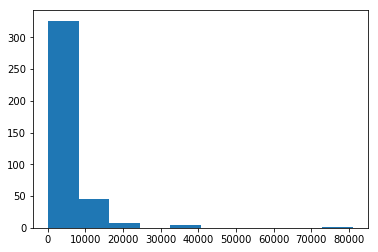

CoapplicantIncome


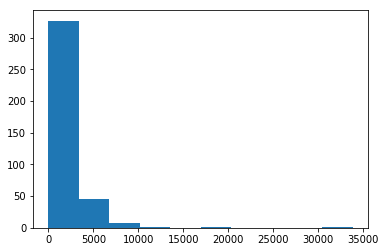

LoanAmount


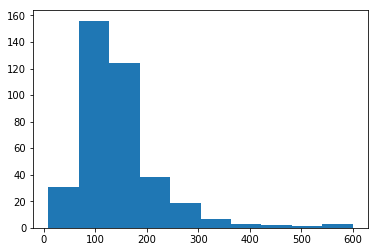

Loan_Amount_Term


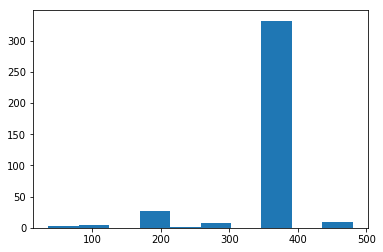

Credit_History


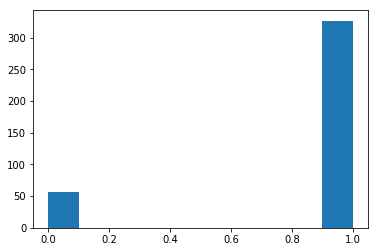

In [9]:
for col in cols:
    print(col)
    plt.hist(X_train[col])
    
    plt.show()

In [10]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Knn = KNeighborsClassifier(n_neighbors = 5)
Knn.fit(X_train[cols], y_train)
y_pred =  Knn.predict(X_test[cols])
accuracy_score(y_pred, y_test)

0.6666666666666666

In [12]:
for col in cols:
    test[col].fillna(test[col].mode()[0], inplace = True)

In [13]:
prediction = Knn.predict(test[cols])

In [14]:
sample

,Loan_ID,Loan_Status


In [15]:
test_df = test.copy()

In [16]:
test_df['Loan_Status'] = prediction

In [17]:
pre = test_df[['Loan_ID','Loan_Status']]

In [18]:
pre.to_csv('prediction.csv', index=False)